In [2]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
filename = 'C://train_r//data//data1_2//data1-2(개별질병).csv'

data = pd.read_csv(filename)

In [3]:
data = data.fillna(0)
data = data.replace('Y', 1)
data.label.replace(['기타질병', '비브리오병', '연쇄구균병', '스쿠티카병', 
       '정상', '활주세균병', '에드워드병', 'VHSV'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

In [15]:
data

,label,OAA,OAB,OBA,OBB,OBC,OBD,OBE,OCA,OCB,...,IFC,IFD,IGA,IGB,IHA,IHB,IIA,IIB,IJA,IJB
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
763,3,0,0,0,0,1,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
764,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0
765,3,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0


In [4]:
train = data.sample(frac=0.7, random_state=786)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [5]:
from pycaret.classification import *
setup_clf = setup(data=train, target='label')

,Description,Value
0,session_id,2608
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(537, 57)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,45
8,Ordinal Features,False
9,High Cardinality Features,False


모델 비교

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3814,0.0000,0.2671,0.3568,0.3328,0.1864,0.2017,0.0120
lr,Logistic Regression,0.3733,0.0000,0.2600,0.3460,0.3414,0.1753,0.1814,0.0310
rf,Random Forest Classifier,0.3656,0.0000,0.2475,0.3131,0.3186,0.1700,0.1794,0.0450
gbc,Gradient Boosting Classifier,0.3605,0.0000,0.2478,0.3302,0.3258,0.1662,0.1736,0.0800
ridge,Ridge Classifier,0.3601,0.0000,0.2540,0.3100,0.3199,0.1637,0.1697,0.0030
et,Extra Trees Classifier,0.3578,0.0000,0.2556,0.3133,0.3173,0.1630,0.1713,0.0330
dt,Decision Tree Classifier,0.3523,0.0000,0.2414,0.3194,0.3144,0.1564,0.1641,0.0030
lda,Linear Discriminant Analysis,0.3414,0.0000,0.2160,0.3042,0.3067,0.1500,0.1564,0.0070
knn,K Neighbors Classifier,0.3070,0.0000,0.2125,0.2908,0.2734,0.0833,0.0885,0.0070
ada,Ada Boost Classifier,0.2831,0.0000,0.1784,0.2434,0.2199,0.0638,0.0738,0.0160


상위 3개의 모델을 생성  
이미 성능 평가를 비교 했으니 cross_validation은 False

In [9]:
LGBM = create_model('lightgbm', cross_validation=False)
lr = create_model('lr', cross_validation=False)
rf = create_model('rf', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4383,0,0.2981,0.4003,0.4054,0.1987,0.2041


하이퍼파라미터 튜닝

In [10]:
tuned_LGBM = tune_model(LGBM, optimize='Accuracy')
tuned_lr = tune_model(lr, optimize='Accuracy')
tuned_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3947,0.0000,0.2764,0.5476,0.3540,0.1862,0.2072
1,0.3158,0.0000,0.2042,0.2407,0.2526,0.0766,0.0851
2,0.2895,0.0000,0.1833,0.1703,0.2144,0.0429,0.0469
3,0.4211,0.0000,0.2442,0.5490,0.3560,0.2194,0.2465
4,0.2895,0.0000,0.1602,0.1552,0.2013,0.0393,0.0451
5,0.4595,0.0000,0.2986,0.4217,0.3946,0.2709,0.2916
6,0.3784,0.0000,0.2556,0.3583,0.3242,0.1583,0.1730
7,0.3243,0.0000,0.2000,0.1717,0.2242,0.0741,0.0868
8,0.2973,0.0000,0.1833,0.1632,0.2106,0.0418,0.0479


블렌딩(튜닝이 끝난 모델들을 앙상블 하는 작업)

In [11]:
blender_specific = blend_models(estimator_list=[tuned_LGBM, tuned_lr, tuned_rf], optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.3736,0.5735,0.4897,0.3352,0.3529
1,0.3421,0.0000,0.2319,0.3876,0.2999,0.1171,0.1260
2,0.2895,0.0000,0.1833,0.1703,0.2144,0.0447,0.0487
3,0.4211,0.0000,0.2442,0.3878,0.3533,0.2245,0.2438
4,0.3158,0.0000,0.1806,0.2200,0.2506,0.0843,0.0905
5,0.5135,0.0000,0.3806,0.4865,0.4678,0.3602,0.3722
6,0.3784,0.0000,0.2667,0.2893,0.3275,0.1762,0.1814
7,0.4054,0.0000,0.2750,0.5766,0.3439,0.1925,0.2802
8,0.2973,0.0000,0.1833,0.1783,0.2228,0.0456,0.0502


시각화

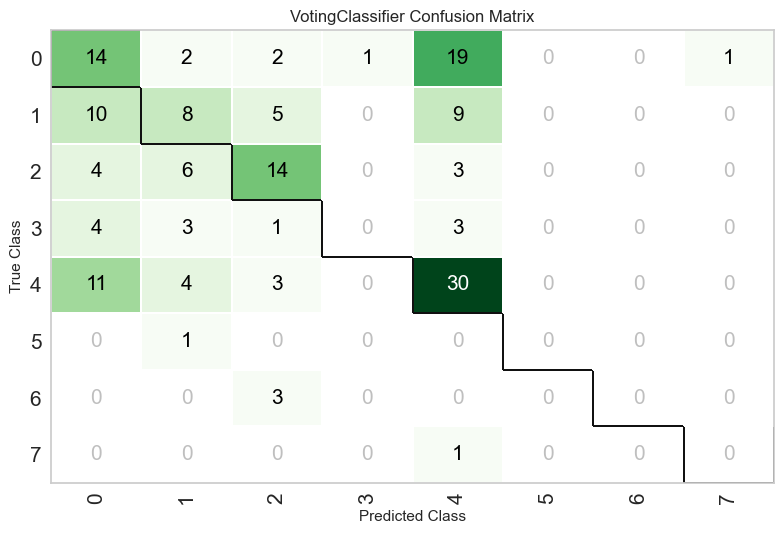

In [18]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
filename = 'C://train_r//data//data1_2//data1-2(개별질병).csv'

data = pd.read_csv(filename)

data = data.fillna(0)
data = data.replace('Y', 1)
data.label.replace(['기타질병', '비브리오병', '연쇄구균병', '스쿠티카병', '정상', '활주세균병', '에드워드병', 'VHSV'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

train = data.sample(frac=0.7, random_state=786)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

from pycaret.classification import *
setup_clf = setup(data=train, target='label')

best_model = compare_models()

LGBM = create_model('lightgbm', cross_validation=False)
lr = create_model('lr', cross_validation=False)
rf = create_model('rf', cross_validation=False)

tuned_LGBM = tune_model(LGBM, optimize='Accuracy')
tuned_lr = tune_model(lr, optimize='Accuracy')
tuned_rf = tune_model(rf, optimize='Accuracy')

blender = blend_models(estimator_list=[tuned_LGBM, tuned_lr, tuned_rf], method='soft')

blender_specific = blend_models(estimator_list=[tuned_LGBM, tuned_lr, tuned_rf], optimize='Accuracy')

plot_model(blender_specific, plot='confusion_matrix')

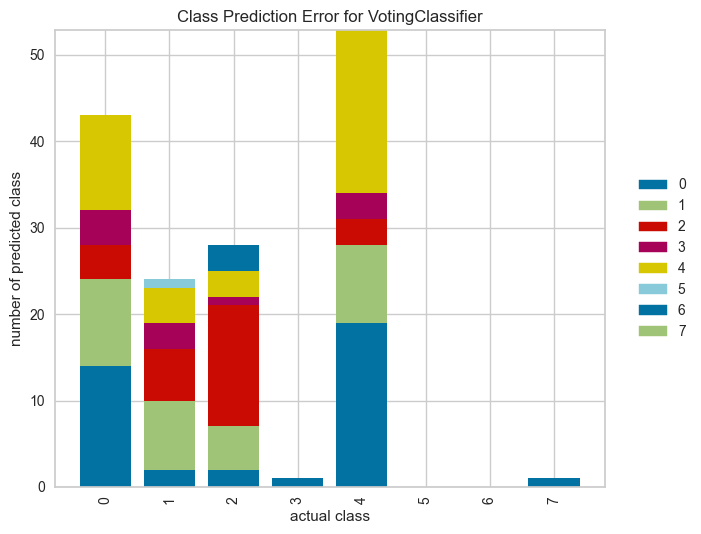

In [19]:
plot_model(blender_specific, plot='error')

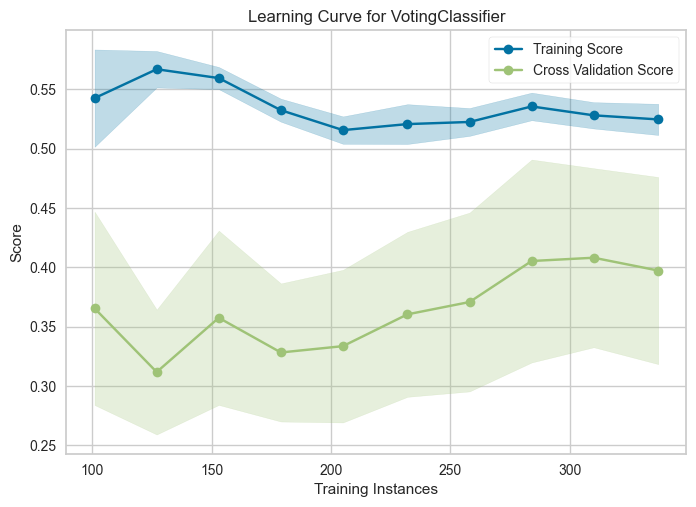

In [20]:
plot_model(blender_specific, plot='learning')

마지막 모델 학습

In [21]:
#마지막 학습
final_model = finalize_model(blender_specific)

In [22]:
#예측
pred = predict_model(final_model, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.3913,0,0.2528,0.3825,0.3478,0.1971,0.2113
